In [2]:
%load_ext autoreload
%autoreload 2

In [9]:
import torch
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


from ae_latent.data.builder import build_dataloaders
from ae_latent.models.builders import build_vect_latent_ae
from ae_latent.analysis.latent.knn_MLE import mle_id_stability_sweep

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

device: cuda


train, val, and test

WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 point

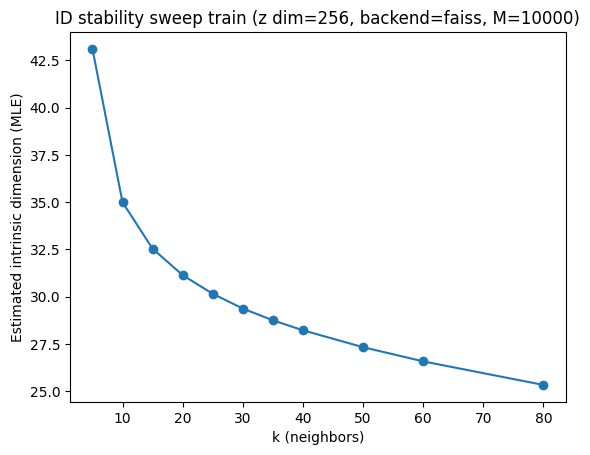

train complete


WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 point

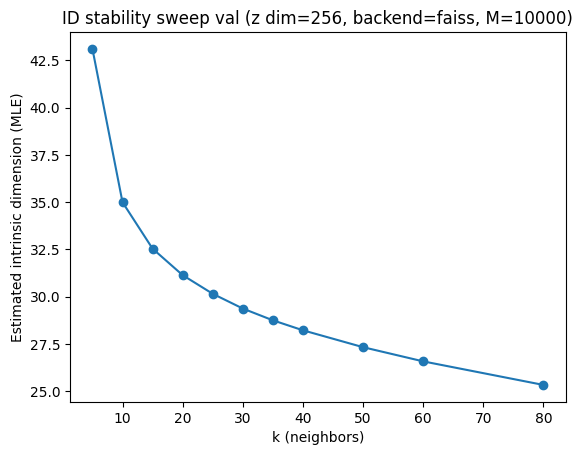

val complete


WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 point

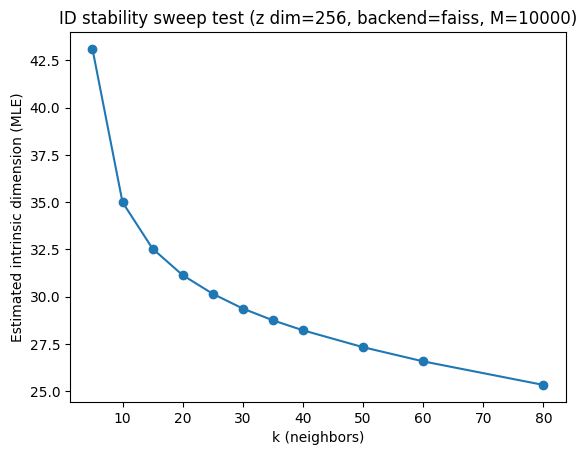

test complete


In [19]:
#Knn ID estimate k sweep
z_dim = 256

splits = ["train", "val", "test"]
runs_dir = "../runs/"
run_name = f"celeba_z{z_dim}"

run_dir = runs_dir + run_name
latent_path = f"{run_dir}/latents/{latent_data_split}_latents.npz"
out_dir = run_dir + "/knn_mle"

directory_path = Path(out_dir)
directory_path.mkdir(parents=True, exist_ok=True)

for split in splits:
    # 1. Load your real latents file
    rec = dict(np.load(latent_path, allow_pickle=True))

    # 2. Run stability sweep (disable internal plotting)
    N = 1024
    sweep = mle_id_stability_sweep(
        rec,
        ks=(5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 80),
        backend="faiss",
        approx=True,
        faiss_nlist=N,
        faiss_nprobe=32,
        max_points=10_000,
        plot=False,
    )

    # 3. Plot (single plot, no custom colors)
    plt.figure()
    plt.plot(sweep["k"], sweep["id_estimate"], marker="o")
    plt.xlabel("k (neighbors)")
    plt.ylabel("Estimated intrinsic dimension (MLE)")
    plt.title(f"ID stability sweep {split} (z dim={z_dim}, backend={sweep['backend']}, M={sweep['M']})")

    plt.savefig(f"{out_dir}/z{z_dim}_id_{split}.png", dpi=300, bbox_inches="tight")
    plt.show()

    # 4. Save numeric results (CSV)
    df = pd.DataFrame({
        "k": sweep["k"],
        "id_estimate": sweep["id_estimate"],
        "n_used": sweep["n_used"],
    })
    df.to_csv(f"{out_dir}/z{z_dim}_id_{split}.csv", index=False)

    # 5. Save full raw output (NPZ, includes q_idx etc.)
    np.savez(f"{out_dir}/z{z_dim}_id_{split}_raw.npz", **sweep)
    print(f"{split} complete")


Just one split

WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 points to 1024 centroids: please provide at least 39936 training points
WARNING clustering 16277 point

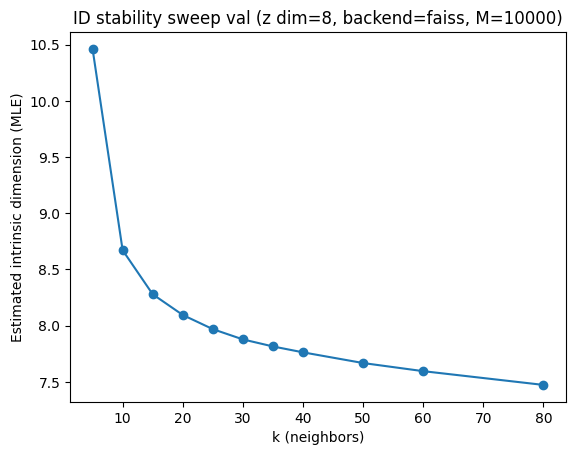

In [12]:
#Knn ID estimate k sweep
z_dim = 8
latent_data_split = "val"

runs_dir = "../runs/"
run_name = f"celeba_z{z_dim}"
run_path = runs_dir + run_name


run_dir = runs_dir + run_name
latent_path = f"{run_dir}/latents/{latent_data_split}_latents.npz"
out_dir = run_dir + "/knn_mle"

directory_path = Path(out_dir)
directory_path.mkdir(parents=True, exist_ok=True)

# 1. Load your real latents file
rec = dict(np.load(latent_path, allow_pickle=True))

# 2. Run stability sweep (disable internal plotting)
#N = rec['Z'].shape[0]
N = 1024
sweep = mle_id_stability_sweep(
    rec,
    ks=(5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 80),
    backend="faiss",
    approx=True,
    faiss_nlist=N,
    faiss_nprobe=32,
    max_points=10_000,
    plot=False,
)

# 3. Plot (single plot, no custom colors)
plt.figure()
plt.plot(sweep["k"], sweep["id_estimate"], marker="o")
plt.xlabel("k (neighbors)")
plt.ylabel("Estimated intrinsic dimension (MLE)")
plt.title(f"ID stability sweep {latent_data_split} (z dim={z_dim}, backend={sweep['backend']}, M={sweep['M']})")

plt.savefig(f"{out_dir}/z{z_dim}_id_{latent_data_split}.png", dpi=300, bbox_inches="tight")
plt.show()

# 4. Save numeric results (CSV)
df = pd.DataFrame({
    "k": sweep["k"],
    "id_estimate": sweep["id_estimate"],
    "n_used": sweep["n_used"],
})
df.to_csv(f"{out_dir}/z{z_dim}_id_{latent_data_split}.csv", index=False)

# 5. Save full raw output (NPZ, includes q_idx etc.)
np.savez(f"{out_dir}/z{z_dim}_id_{latent_data_split}_raw.npz", **sweep)